# Pretraining Dataset Visualization

This notebook visualizes the three pretraining datasets:
1. AI4I 2020 Predictive Maintenance
2. IoT Sensor Data
3. Steel Industry Energy Consumption

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style
plt.style.use('default')
sns.set_palette("husl")

# Data directory
data_dir = Path('../data')

## 1. AI4I 2020 Predictive Maintenance Dataset

In [2]:
# Load AI4I dataset
ai4i = pd.read_csv(data_dir / 'ai4i2020.csv')

print("AI4I 2020 Dataset Shape:", ai4i.shape)
print("\nColumn Names:")
print(ai4i.columns.tolist())
print("\nData Types:")
print(ai4i.dtypes)
print("\nFirst 5 rows:")
ai4i.head()

AI4I 2020 Dataset Shape: (10000, 14)

Column Names:
['UDI', 'Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

Data Types:
UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

First 5 rows:


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [3]:
# Statistical summary
print("\nStatistical Summary:")
print(ai4i.describe())

# Unique value counts
print("\n" + "="*60)
print("UNIQUE VALUE COUNTS (nunique)")
print("="*60)
nunique_df = pd.DataFrame({
    'Column': ai4i.columns,
    'Unique Values': [ai4i[col].nunique() for col in ai4i.columns],
    'Data Type': ai4i.dtypes.values
})
print(nunique_df.to_string(index=False))
print("="*60)


Statistical Summary:
               UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]  Machine failure  \
count            10000.000000  10000.000000     10000.000000     10000.000000   
mean              1538.776100     39.986910       107.951000         0.033900   
std                179.284096      9.968934        63.654147         0.180981   
min               1168.000000      3.8000

In [4]:
# Select only numeric columns for visualization
ai4i_numeric = ai4i.select_dtypes(include=[np.number])
numeric_cols = ai4i_numeric.columns.tolist()

print(f"\nNumeric variables ({len(numeric_cols)}):")
for i, col in enumerate(numeric_cols, 1):
    print(f"{i}. {col}")


Numeric variables (12):
1. UDI
2. Air temperature [K]
3. Process temperature [K]
4. Rotational speed [rpm]
5. Torque [Nm]
6. Tool wear [min]
7. Machine failure
8. TWF
9. HDF
10. PWF
11. OSF
12. RNF


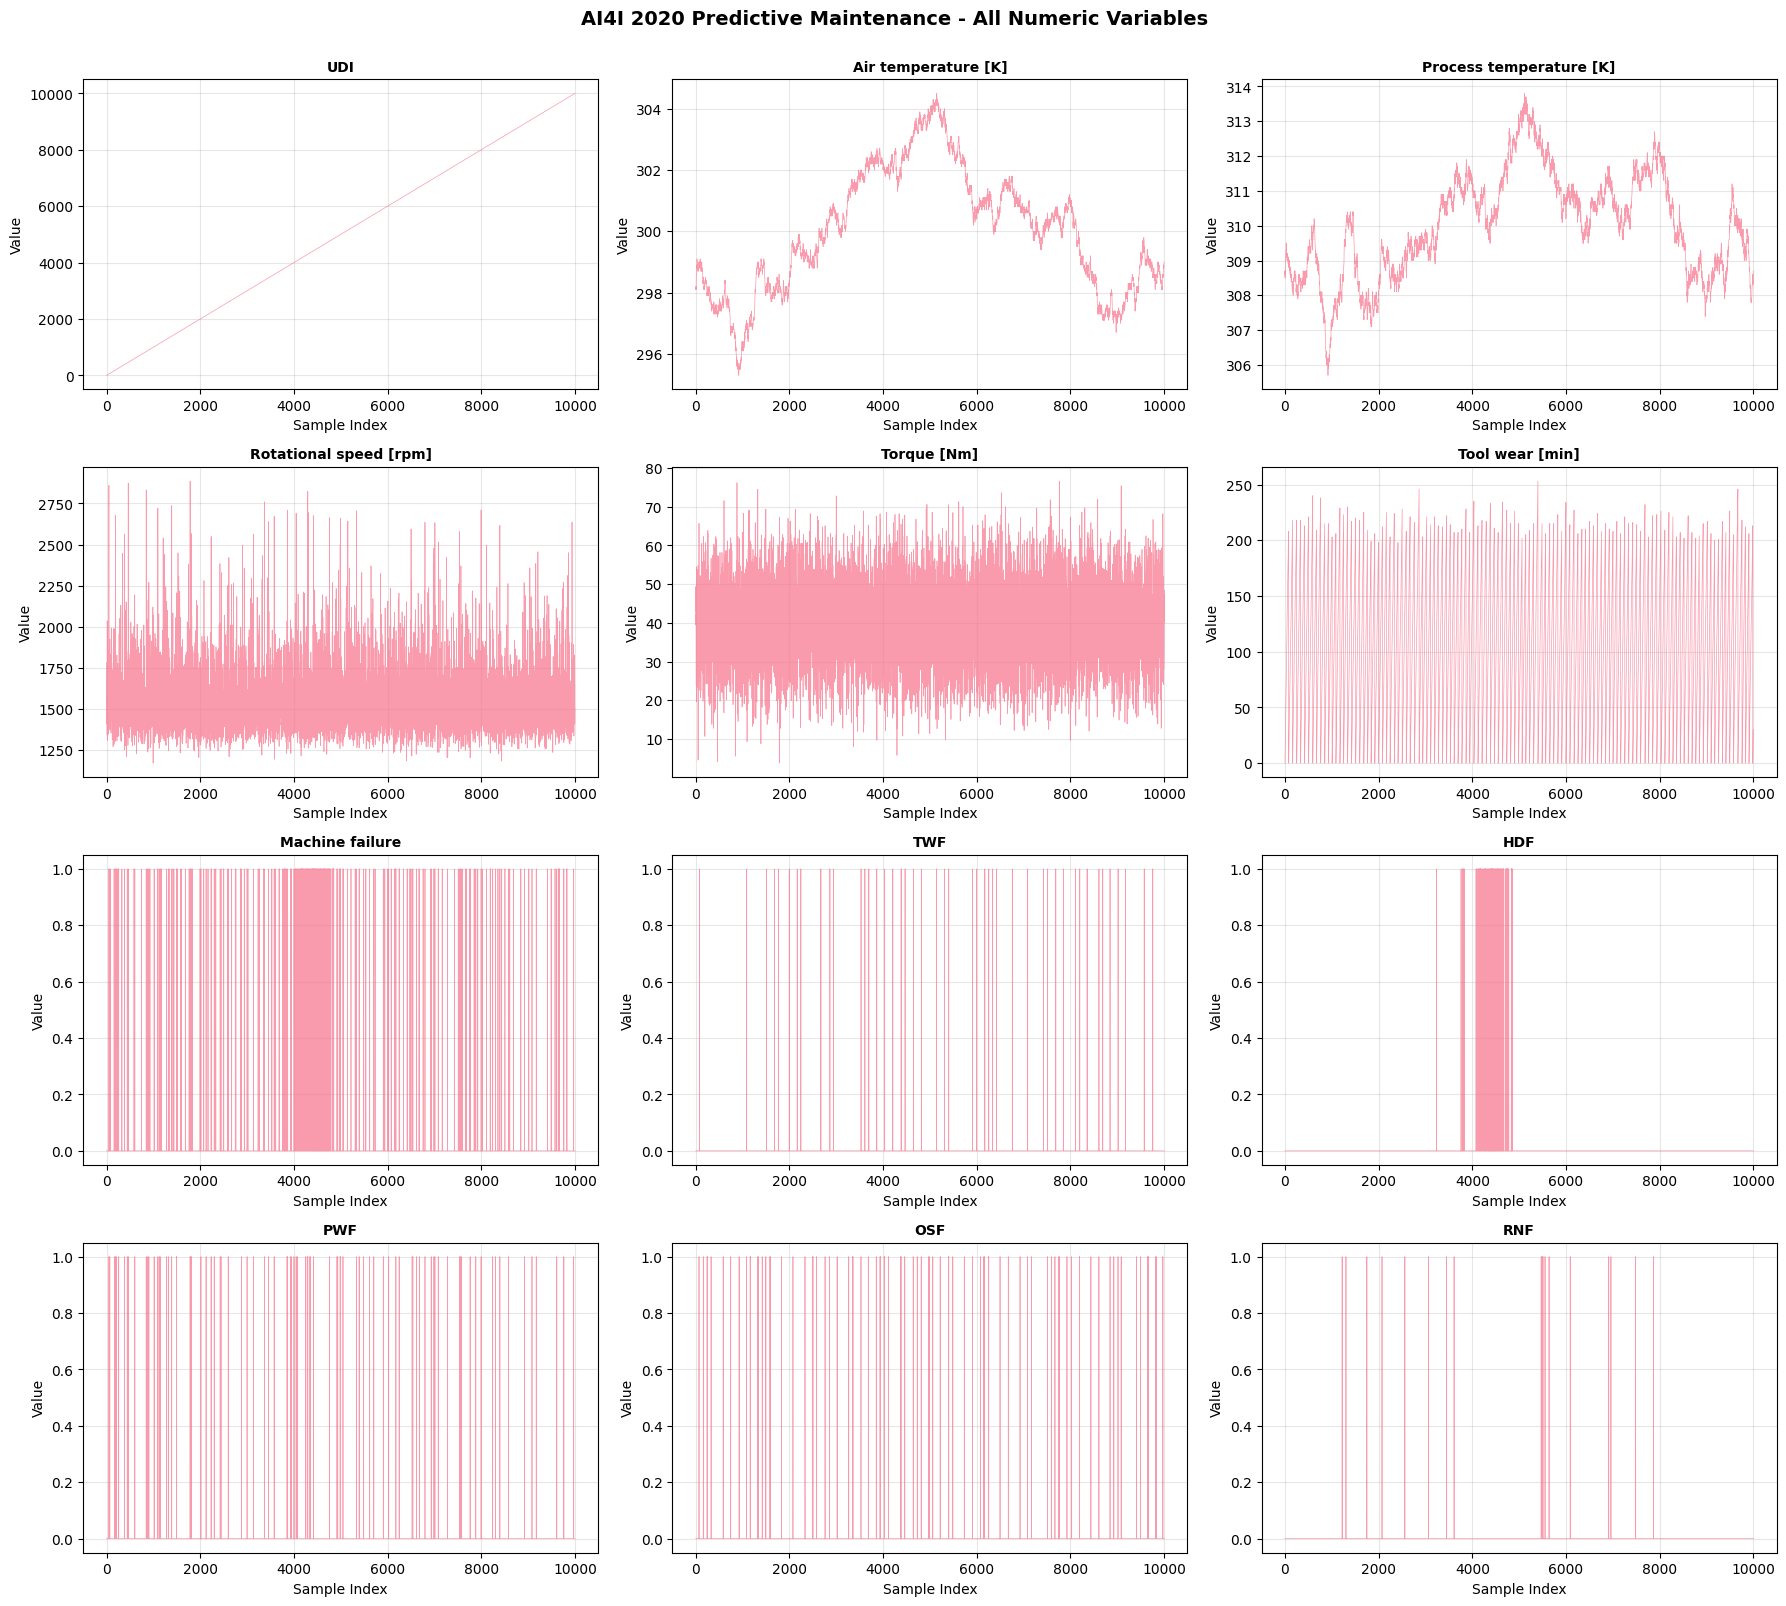

In [5]:
# Visualize AI4I numeric variables
n_cols = len(numeric_cols)
n_rows = (n_cols + 2) // 3  # 3 columns per row

fig, axes = plt.subplots(n_rows, 3, figsize=(18, 4*n_rows))
axes = axes.flatten() if n_cols > 1 else [axes]

for idx, col in enumerate(numeric_cols):
    axes[idx].plot(ai4i_numeric[col], linewidth=0.5, alpha=0.7)
    axes[idx].set_title(f'{col}', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('Sample Index')
    axes[idx].set_ylabel('Value')
    axes[idx].grid(True, alpha=0.3)

# Hide empty subplots
for idx in range(n_cols, len(axes)):
    axes[idx].axis('off')

plt.suptitle('AI4I 2020 Predictive Maintenance - All Numeric Variables', 
             fontsize=14, fontweight='bold', y=1.001)
plt.tight_layout()
plt.show()

## 2. IoT Sensor Dataset

In [7]:
# Load IoT dataset
iot = pd.read_csv(data_dir / 'IoT.csv')

print("IoT Dataset Shape:", iot.shape)
print("\nColumn Names:")
print(iot.columns.tolist())
print("\nData Types:")
print(iot.dtypes)
print("\nFirst 5 rows:")
iot.head()

IoT Dataset Shape: (1000, 7)

Column Names:
['Timestamp', 'Vibration (mm/s)', 'Temperature (°C)', 'Pressure (bar)', 'RMS Vibration', 'Mean Temp', 'Fault Label']

Data Types:
Timestamp            object
Vibration (mm/s)    float64
Temperature (°C)    float64
Pressure (bar)      float64
RMS Vibration       float64
Mean Temp           float64
Fault Label           int64
dtype: object

First 5 rows:


,Timestamp,Vibration (mm/s),Temperature (°C),Pressure (bar),RMS Vibration,Mean Temp,Fault Label
0,2023-03-10 00:00:00,0.437086,64.810634,7.785117,0.601657,90.561384,1
1,2023-03-10 00:01:00,0.955643,93.352076,7.740936,0.601657,90.561384,1
2,2023-03-10 00:02:00,0.758795,119.835667,9.718764,0.601657,90.561384,0
3,2023-03-10 00:03:00,0.638793,108.577991,7.748639,0.601657,90.561384,1
4,2023-03-10 00:04:00,0.240417,114.524892,7.815849,0.601657,90.561384,0


In [8]:
# Statistical summary
print("\nStatistical Summary:")
print(iot.describe())

# Unique value counts
print("\n" + "="*60)
print("UNIQUE VALUE COUNTS (nunique)")
print("="*60)
nunique_df = pd.DataFrame({
    'Column': iot.columns,
    'Unique Values': [iot[col].nunique() for col in iot.columns],
    'Data Type': iot.dtypes.values
})
print(nunique_df.to_string(index=False))
print("="*60)


Statistical Summary:
       Vibration (mm/s)  Temperature (°C)  Pressure (bar)  RMS Vibration  \
count       1000.000000       1000.000000     1000.000000    1000.000000   
mean           0.541231         90.561384        8.507217       0.601657   
std            0.262924         23.375191        0.872023       0.000000   
min            0.104169         50.257461        7.000035       0.601657   
25%            0.312376         69.285942        7.784053       0.601657   
50%            0.547127         91.498713        8.501842       0.601657   
75%            0.769888        110.837205        9.277311       0.601657   
max            0.999746        129.953098        9.993463       0.601657   

          Mean Temp  Fault Label  
count  1.000000e+03  1000.000000  
mean   9.056138e+01     0.479000  
std    1.421797e-14     0.652675  
min    9.056138e+01     0.000000  
25%    9.056138e+01     0.000000  
50%    9.056138e+01     0.000000  
75%    9.056138e+01     1.000000  
max    9.0561

In [9]:
# Select only numeric columns for visualization
iot_numeric = iot.select_dtypes(include=[np.number])
iot_cols = iot_numeric.columns.tolist()

print(f"\nNumeric variables ({len(iot_cols)}):")
for i, col in enumerate(iot_cols, 1):
    print(f"{i}. {col}")


Numeric variables (6):
1. Vibration (mm/s)
2. Temperature (°C)
3. Pressure (bar)
4. RMS Vibration
5. Mean Temp
6. Fault Label


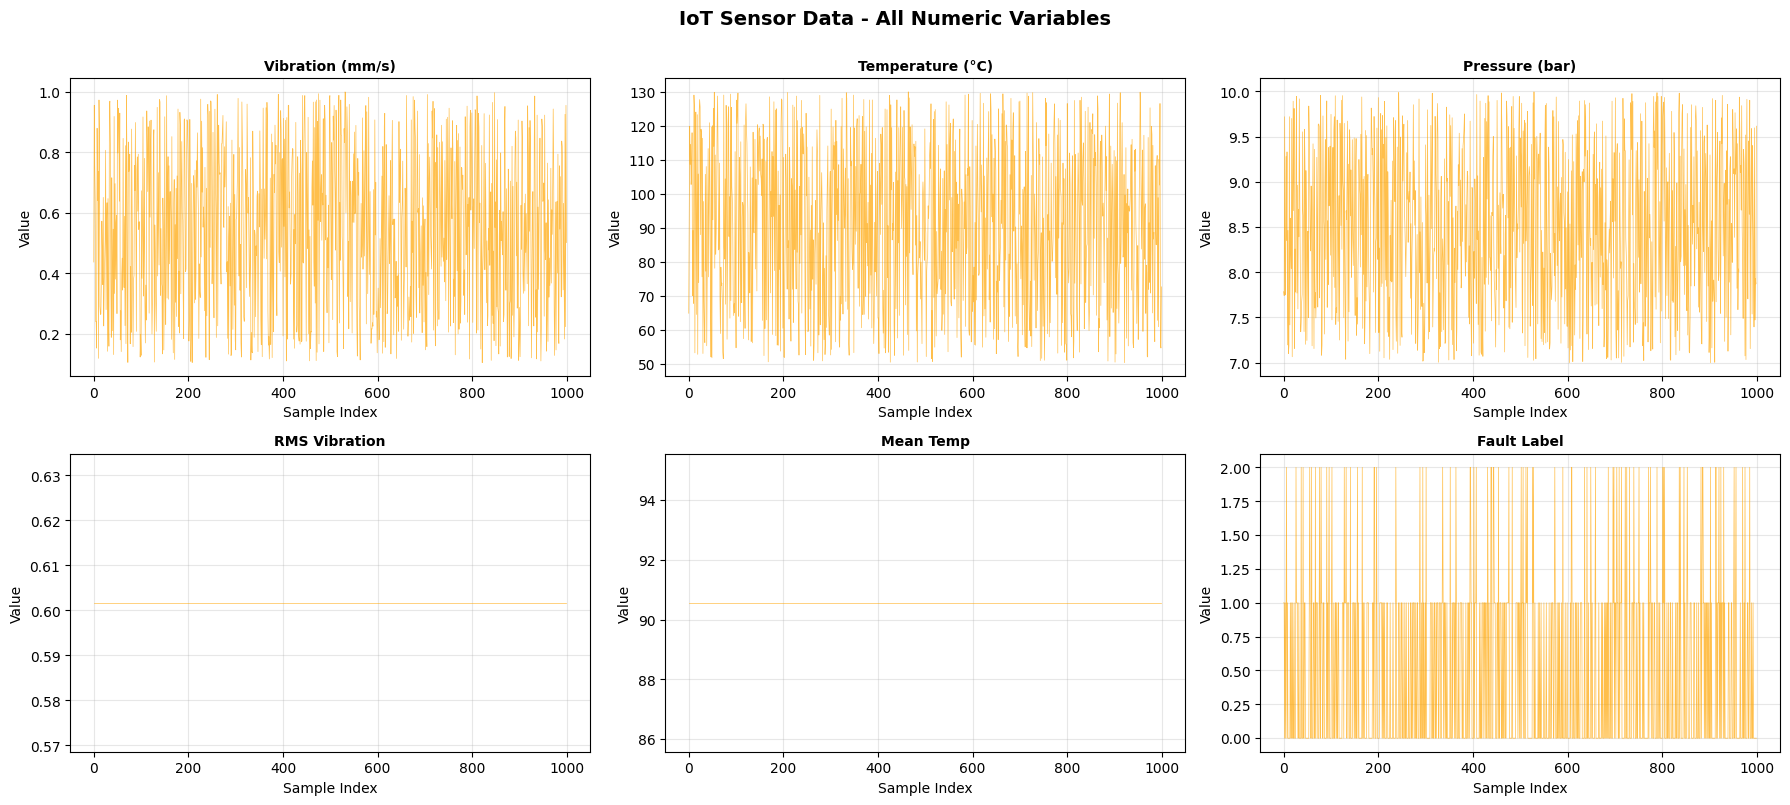

In [11]:
# Visualize IoT numeric variables
n_cols = len(iot_cols)
n_rows = (n_cols + 2) // 3

fig, axes = plt.subplots(n_rows, 3, figsize=(18, 4*n_rows))
axes = axes.flatten() if n_cols > 1 else [axes]

for idx, col in enumerate(iot_cols):
    axes[idx].plot(iot_numeric[col], linewidth=0.5, alpha=0.7, color='orange')
    axes[idx].set_title(f'{col}', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('Sample Index')
    axes[idx].set_ylabel('Value')
    axes[idx].grid(True, alpha=0.3)

# Hide empty subplots
for idx in range(n_cols, len(axes)):
    axes[idx].axis('off')

plt.suptitle('IoT Sensor Data - All Numeric Variables', 
             fontsize=14, fontweight='bold', y=1.001)
plt.tight_layout()
plt.show()

## 3. Steel Industry Energy Consumption Dataset

In [12]:
# Load Steel Industry dataset
steel = pd.read_csv(data_dir / 'Steel_industry.csv')

print("Steel Industry Dataset Shape:", steel.shape)
print("\nColumn Names:")
print(steel.columns.tolist())
print("\nData Types:")
print(steel.dtypes)
print("\nFirst 5 rows:")
steel.head()

Steel Industry Dataset Shape: (35041, 11)

Column Names:
['Date_Time', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM', 'WeekStatus', 'Day_Of_Week', 'Load_Type']

Data Types:
Date_Time                                object
Usage_kWh                               float64
Lagging_Current_Reactive.Power_kVarh    float64
Leading_Current_Reactive_Power_kVarh    float64
CO2(tCO2)                               float64
Lagging_Current_Power_Factor            float64
Leading_Current_Power_Factor            float64
NSM                                       int64
WeekStatus                               object
Day_Of_Week                              object
Load_Type                                object
dtype: object

First 5 rows:


,Date_Time,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_Of_Week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [13]:
# Statistical summary
print("\nStatistical Summary:")
print(steel.describe())

# Unique value counts
print("\n" + "="*60)
print("UNIQUE VALUE COUNTS (nunique)")
print("="*60)
nunique_df = pd.DataFrame({
    'Column': steel.columns,
    'Unique Values': [steel[col].nunique() for col in steel.columns],
    'Data Type': steel.dtypes.values
})
print(nunique_df.to_string(index=False))
print("="*60)


Statistical Summary:
          Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
count  35041.000000                          35041.000000   
mean      27.386229                             13.035012   
std       33.444133                             16.305916   
min        0.000000                              0.000000   
25%        3.200000                              2.300000   
50%        4.570000                              5.000000   
75%       51.230000                             22.640000   
max      157.180000                             96.910000   

       Leading_Current_Reactive_Power_kVarh     CO2(tCO2)  \
count                          35041.000000  35041.000000   
mean                               3.871412      0.011524   
std                                7.424863      0.016151   
min                                0.000000      0.000000   
25%                                0.000000      0.000000   
50%                                0.000000      0.000000   
7

In [14]:
# Select only numeric columns for visualization
steel_numeric = steel.select_dtypes(include=[np.number])
steel_cols = steel_numeric.columns.tolist()

print(f"\nNumeric variables ({len(steel_cols)}):")
for i, col in enumerate(steel_cols, 1):
    print(f"{i}. {col}")


Numeric variables (7):
1. Usage_kWh
2. Lagging_Current_Reactive.Power_kVarh
3. Leading_Current_Reactive_Power_kVarh
4. CO2(tCO2)
5. Lagging_Current_Power_Factor
6. Leading_Current_Power_Factor
7. NSM


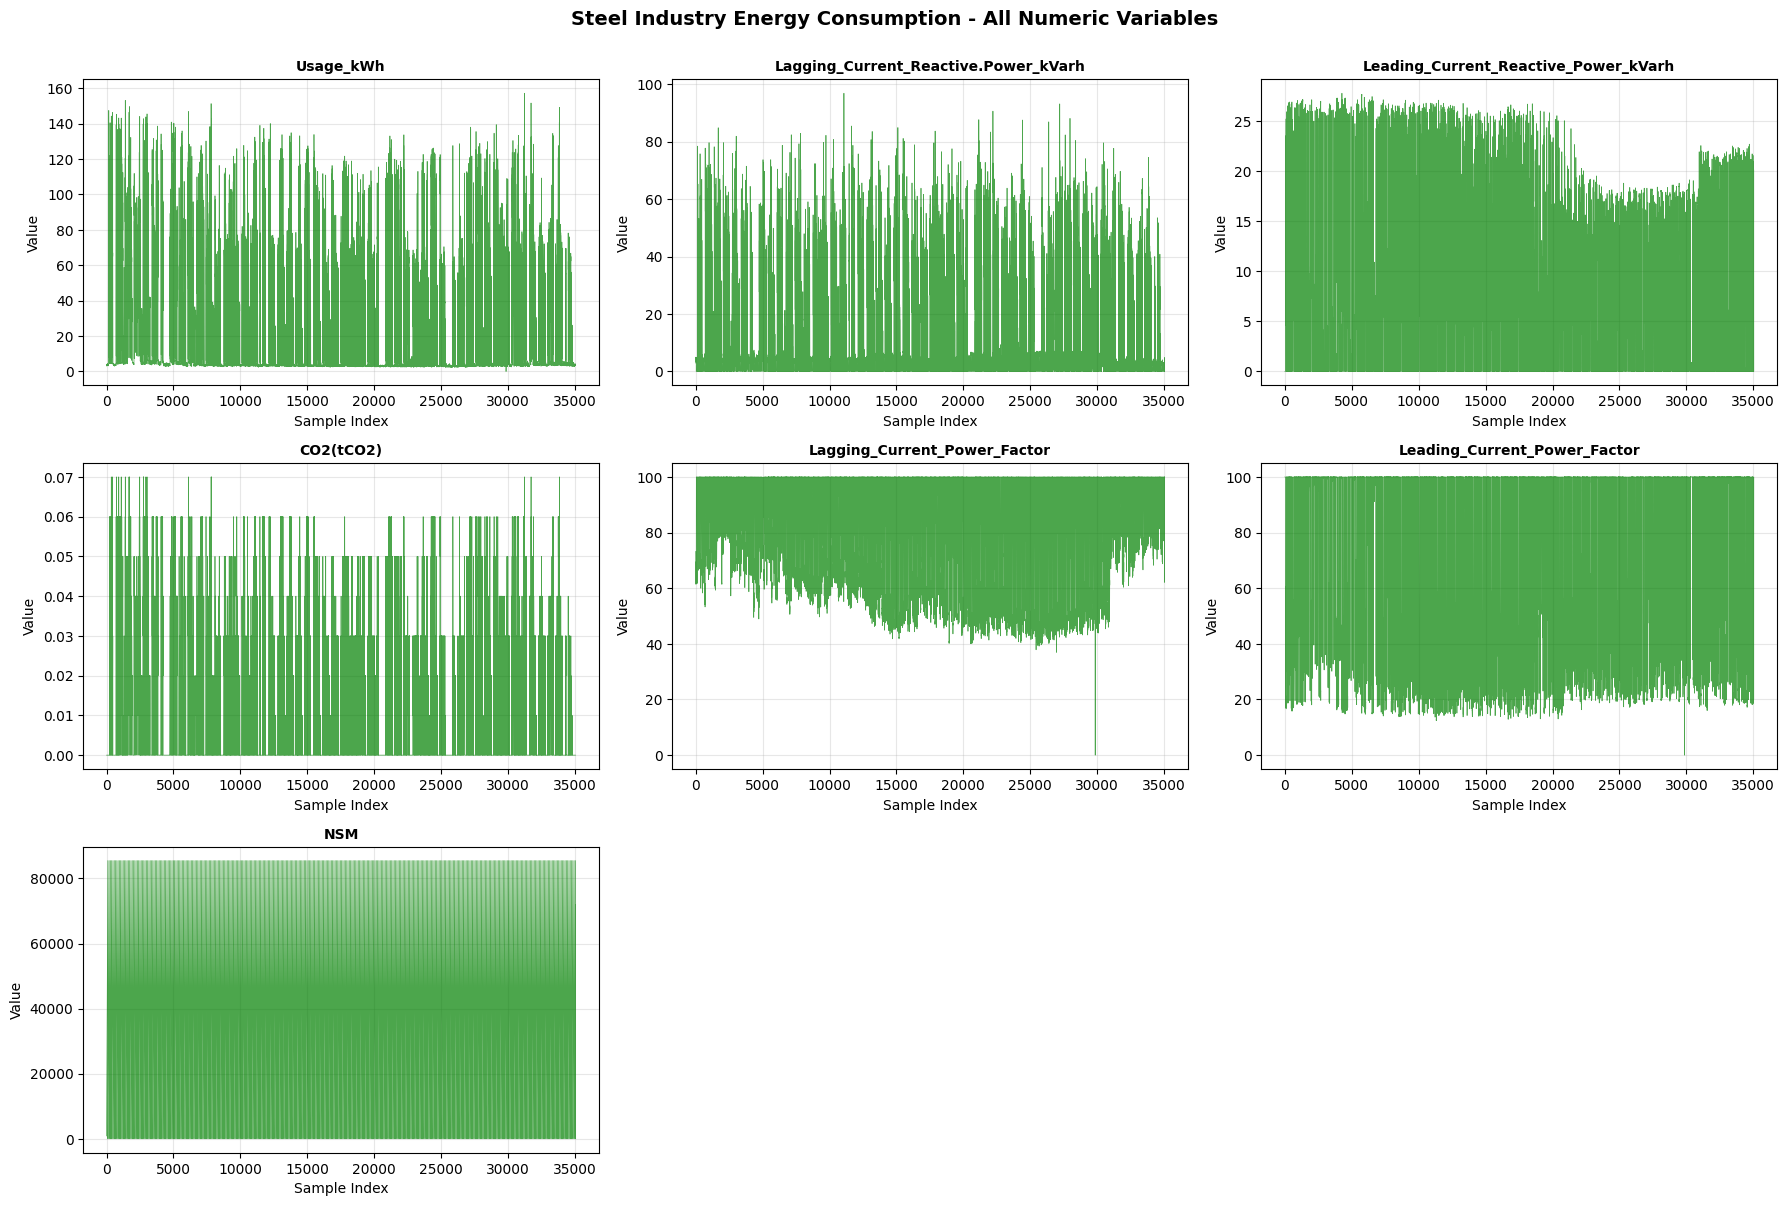

In [16]:
# Visualize Steel Industry numeric variables
n_cols = len(steel_cols)
n_rows = (n_cols + 2) // 3

fig, axes = plt.subplots(n_rows, 3, figsize=(18, 4*n_rows))
axes = axes.flatten() if n_cols > 1 else [axes]

for idx, col in enumerate(steel_cols):
    axes[idx].plot(steel_numeric[col], linewidth=0.5, alpha=0.7, color='green')
    axes[idx].set_title(f'{col}', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('Sample Index')
    axes[idx].set_ylabel('Value')
    axes[idx].grid(True, alpha=0.3)

# Hide empty subplots
for idx in range(n_cols, len(axes)):
    axes[idx].axis('off')

plt.suptitle('Steel Industry Energy Consumption - All Numeric Variables', 
             fontsize=14, fontweight='bold', y=1.001)
plt.tight_layout()
plt.show()

## Summary: Dataset Comparison

In [14]:
# Create comparison table
comparison = pd.DataFrame({
    'Dataset': ['AI4I 2020', 'IoT Sensor', 'Steel Industry'],
    'Total Rows': [len(ai4i), len(iot), len(steel)],
    'Total Columns': [len(ai4i.columns), len(iot.columns), len(steel.columns)],
    'Numeric Columns': [len(numeric_cols), len(iot_cols), len(steel_cols)]
})

print("\n" + "="*60)
print("DATASET COMPARISON SUMMARY")
print("="*60)
print(comparison.to_string(index=False))
print("="*60)


DATASET COMPARISON SUMMARY
       Dataset  Total Rows  Total Columns  Numeric Columns
     AI4I 2020       10000             14               12
    IoT Sensor        1000              7                6
Steel Industry       35041             11                7
